In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow.keras as keras

In [15]:
#read data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [16]:
print(train.shape)
print(test.shape)

(5000000, 3)
(2000000, 2)


In [17]:
train.head(5)

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0


In [18]:
test.head(5)

,time,signal
0,500.0001,-2.6498
1,500.0002,-2.8494
2,500.0003,-2.8600
3,500.0004,-2.4350
4,500.0005,-2.6155


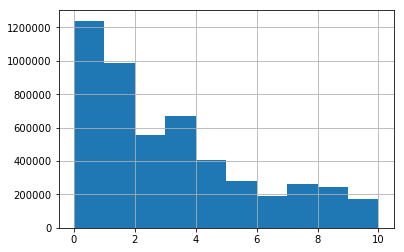

In [19]:
train['open_channels'].hist()

In [20]:
#RNN
import numpy as np
WINDOW_SIZE = 10
def generator_data(train, batch_size, WINDOW_SIZE = 100):
    X_train = []
    Y_train = []
    for i in range(WINDOW_SIZE,train.shape[0]):
        print("DEBUG", i)
        X_train.append(train.to_numpy()[i-WINDOW_SIZE:i, 1])
        Y_train.append(train.to_numpy()[i-WINDOW_SIZE:i, 2])
        if (i-WINDOW_SIZE+1) % batch_size == 0:
            print(len(X_train))
            print(len(Y_train))
            data_generate = (np.array(X_train), np.array(Y_train))
            X_train = [] 
            Y_train = []
            yield data_generate
data_generator = generator_data(train, batch_size=8, WINDOW_SIZE=WINDOW_SIZE)

In [21]:
(X_train, Y_train) = next(data_generator)

DEBUG 10
DEBUG 11
DEBUG 12
DEBUG 13
DEBUG 14
DEBUG 15
DEBUG 16
DEBUG 17
8
8


In [22]:
print(X_train.shape)
print(Y_train.shape)

(8, 10)
(8, 10)


In [26]:
# Build model
model = keras.models.Sequential()
model.add(keras.layers.LSTM(10,input_shape=(8,10)))
model.compile(loss='mean_squared_error', optimizer='adam')


Instructions for updating:
Use tf.cast instead.


In [28]:
model.fit(X_train,Y_train)

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (8, 10)